In [20]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from numpy import unique
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [1]:
import uuid
my_name = "Ryan Eakins"
print(my_name + ": " + str(uuid.uuid1()))

Ryan Eakins: 27389ad0-ed11-11ee-bd14-ce8b5d69cb6a


In [11]:
# Load in the iris dataset from sklearn library
# See here for more information on how to load iris dataset:
# https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

from sklearn import datasets

iris = datasets.load_iris()

print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [14]:
# Assign the iris data to the "x" variable
# Assign the iris labels to the "y" variable
x = iris.data

y = iris.target

In [15]:
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [16]:
# Reshape the x variable from a 2-dimensional array to a 3-dimensional array
new_shape = (1, x.shape[0], x.shape[1])
x_3d = np.reshape(x, new_shape)

In [34]:
print(new_shape)

(1, 150, 4)


In [18]:
# Train/test split x and y with a test size of 0.15 and a random state of 100
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.15, random_state = 100)

In [19]:
# Build a CNN modelin using Conv1D (nothing for you to do here, just run this cell block)
model = Sequential()
model.add(Conv1D(64, 2, activation="relu", input_shape=(4,1)))
model.add(Dense(16, activation="relu"))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(3, activation = 'softmax'))

In [25]:
# Compile the model using sparse_categorical_crossentropy as loss, adam for optimizer,
# and accuracy for metrics
model.compile(optimizer = "adam", loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ["accuracy"])

In [30]:
# Fit the model with a batch size of 50 and 10 epochs
history = model.fit(xtrain, ytrain, epochs = 10, batch_size = 50, validation_data = (xtest, ytest))

Epoch 1/10
3/3 [==============================] - 0s 39ms/step - loss: 0.9407 - accuracy: 0.6299 - val_loss: 0.9127 - val_accuracy: 0.6087
Epoch 2/10
3/3 [==============================] - 0s 5ms/step - loss: 0.9339 - accuracy: 0.6142 - val_loss: 0.9018 - val_accuracy: 0.6087
Epoch 3/10
3/3 [==============================] - 0s 5ms/step - loss: 0.9263 - accuracy: 0.6299 - val_loss: 0.8924 - val_accuracy: 0.6087
Epoch 4/10
3/3 [==============================] - 0s 4ms/step - loss: 0.9188 - accuracy: 0.6693 - val_loss: 0.8829 - val_accuracy: 0.6957
Epoch 5/10
3/3 [==============================] - 0s 5ms/step - loss: 0.9117 - accuracy: 0.7008 - val_loss: 0.8742 - val_accuracy: 0.7826
Epoch 6/10
3/3 [==============================] - 0s 5ms/step - loss: 0.9046 - accuracy: 0.8031 - val_loss: 0.8633 - val_accuracy: 0.8261
Epoch 7/10
3/3 [==============================] - 0s 4ms/step - loss: 0.8974 - accuracy: 0.7953 - val_loss: 0.8527 - val_accuracy: 0.7391
Epoch 8/10
3/3 [=================

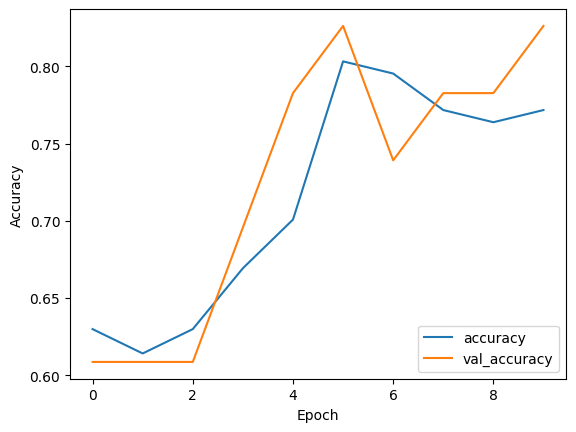

In [32]:
# Plot the results

# Plt the accuracy and validation accuracy with Epoch as the x-axis and 
# Accuracy as the y-axis.
# Don't forget to provide the x and y axis labels and plot the legend in
# the lower right corner of the plot
plt.plot(history.history["accuracy"], label = "accuracy")
plt.plot(history.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")

# One of your blackboard homework assignment questions will ask you to submit
# this image. Make sure to save this image as a png for submission.

In [33]:
# Evaluate the model and print the loss and accuracy
acc = model.evaluate(xtest, ytest, verbose = 2)

1/1 - 0s - loss: 0.8229 - accuracy: 0.8261 - 12ms/epoch - 12ms/step
